# NumPy

NumPy используется как основа почти для всех математических библиотек в Python. В пакете реализоавны и хорошо оптимизированы операции над векторами, матрицами и т.п.

In [2]:
import numpy as np

### Создание массивов

[Документация](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

#### Из списка Python

In [3]:
ar = np.array([1, 2])
ar

array([1, 2])

In [4]:
ar = np.array([[1, 2], [3, 4]])
ar

array([[1, 2],
       [3, 4]])

Размерность массива можно узнать с помощью функции 
> np.shape()

или свойства .shape

> ar.shape

In [5]:
print(np.shape(ar), ar.shape)

(2, 2) (2, 2)


#### С помощью специальных функций

In [6]:
np.zeros(5) # лучше np.zeros((5, ))

array([ 0.,  0.,  0.,  0.,  0.])

In [7]:
np.zeros((3, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [8]:
np.ones((3, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [9]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [10]:
np.linspace(1, 10, 4)

array([  1.,   4.,   7.,  10.])

In [11]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [12]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Массивы numpy типизированы, тип массива выводится во время создания, но его можно указать явно:

In [13]:
ar = np.array([1, 2, 3], dtype=np.double)
ar

array([ 1.,  2.,  3.])

In [14]:
ar.dtype

dtype('float64')

Физически массивы numpy - это массив байт, разменость хранится отдельно и её можно поменять с помощью метода (общий размер не должен меняться)

> .reshape

В некоторых случаях операция может копировать данные.

In [15]:
a = np.arange(0, 16)
b = a.reshape((2, 8))
print('a =', a)
print('b =', b)

a = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
b = [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]


In [16]:
b[1, 0] = 18
print('a =', a)
print('b =', b)

a = [ 0  1  2  3  4  5  6  7 18  9 10 11 12 13 14 15]
b = [[ 0  1  2  3  4  5  6  7]
 [18  9 10 11 12 13 14 15]]


Можно изменить размер массива

In [17]:
a = np.arange(0, 16)
a.resize((3, 8))

print(a)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [ 0  0  0  0  0  0  0  0]]


### Индексация массивов

In [18]:
a = np.arange(0, 16).reshape((4, 4))
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [19]:
print(a[0, 2], a[0][2])

2 2


#### Slicing

In [20]:
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [21]:
print(a[0:2,1:3])

[[1 2]
 [5 6]]


In [22]:
print(a[2, :])

[ 8  9 10 11]


In [23]:
print(a[0:2, ::-1])

[[3 2 1 0]
 [7 6 5 4]]


In [24]:
a[:, 1] = 1
print(a)

[[ 0  1  2  3]
 [ 4  1  6  7]
 [ 8  1 10 11]
 [12  1 14 15]]


In [25]:
a[0, :2] = np.ones(2)
print(a)

[[ 1  1  2  3]
 [ 4  1  6  7]
 [ 8  1 10 11]
 [12  1 14 15]]


#### Advanced indexing

Если в качестве индексатора использовать массивы одинакового размера, то создастся подмасив из соответствующих элементов

In [26]:
a = np.arange(16).reshape((4, 4))
print(a)

rows = [1, 3]
columns = [2, 2]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [27]:
# получаем массив [ a[row[0], column[0]], a[row[1], column[1]] ]
print(a[rows, columns])

[ 6 14]


In [28]:
print(a[ [[0, 0], [1, 1]], [[2, 2], [3, 3]] ])

[[2 2]
 [7 7]]


Можно смешивать способоы индексации

In [29]:
print(a[[0, 1], :2])

print(a[2:, [0, 1]])

[[0 1]
 [4 5]]
[[ 8  9]
 [12 13]]


Можно использовать маски из логических значений:

In [30]:
print(a > 3)

[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [31]:
print(a[a > 3])

[ 4  5  6  7  8  9 10 11 12 13 14 15]


In [32]:
print(a.sum(axis=1) > 8)

[False  True  True  True]


In [33]:
a[a.sum(axis=1) > 8]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### Базовые операции

In [34]:
ar = np.ones((4, 4)) * np.array([[1, 2, 3, 4]])
ar

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.]])

In [35]:
print(ar.sum(), ar.sum(axis=0), ar.sum(axis=1), sep=';')

40.0;[  4.   8.  12.  16.];[ 10.  10.  10.  10.]


In [36]:
ar.ravel()

array([ 1.,  2.,  3.,  4.,  1.,  2.,  3.,  4.,  1.,  2.,  3.,  4.,  1.,
        2.,  3.,  4.])

In [37]:
a = np.arange(0, 5).reshape((1, 5))
b = np.arange(5, 10).reshape((1, 5))
np.concatenate((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [38]:
np.concatenate((a, b), axis=1)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [39]:
np.vstack((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [40]:
np.hstack((a, b))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

### Линейная алгебра

In [41]:
mat = np.ones((5, 5))
mat

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [42]:
mat + mat

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.]])

Если размерности не совпадают, то операции совершаются рекурсивно над подмассивом соответствующей размерности вдоль возможной старшей оси. 

In [43]:
mat + 2

array([[ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.]])

In [44]:
mat + np.array([1, 2, 3, 4, 5])

array([[ 2.,  3.,  4.,  5.,  6.],
       [ 2.,  3.,  4.,  5.,  6.],
       [ 2.,  3.,  4.,  5.,  6.],
       [ 2.,  3.,  4.,  5.,  6.],
       [ 2.,  3.,  4.,  5.,  6.]])

In [45]:
mat + np.array([[1], [2], [3], [4], [5]])

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.]])

In [46]:
mat + np.ones(5)

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.]])

In [47]:
5 * mat

array([[ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.]])

In [48]:
np.sin(mat)

array([[ 0.84147098,  0.84147098,  0.84147098,  0.84147098,  0.84147098],
       [ 0.84147098,  0.84147098,  0.84147098,  0.84147098,  0.84147098],
       [ 0.84147098,  0.84147098,  0.84147098,  0.84147098,  0.84147098],
       [ 0.84147098,  0.84147098,  0.84147098,  0.84147098,  0.84147098],
       [ 0.84147098,  0.84147098,  0.84147098,  0.84147098,  0.84147098]])

In [49]:
mat = np.arange(16).reshape(4, 4)
#транспонирование
mat.T, mat.transpose()

# матричное умножение
np.dot(mat, mat)
mat @ mat
mat.dot(mat)

# определитель
np.linalg.det(mat)

# обратная матрица
np.linalg.inv(np.array([[1, 0], [0, 1]]))

# псевдообратная матрица
np.linalg.pinv(mat)

# собственные числа
np.linalg.eigvals(mat)

# собственные вектора
np.linalg.eig(mat)

# SVD разложение
np.linalg.svd(mat)

(array([[-0.09184212, -0.83160389,  0.53389888,  0.12227833],
        [-0.31812733, -0.44586433, -0.80300606,  0.23490695],
        [-0.54441254, -0.06012478,  0.00431548, -0.8366489 ],
        [-0.77069775,  0.32561478,  0.2647917 ,  0.47946362]]),
 array([  3.51399637e+01,   2.27661021e+00,   1.79164689e-15,
          9.84875082e-17]),
 array([[-0.42334086, -0.47243254, -0.52152422, -0.57061589],
        [ 0.72165263,  0.27714165, -0.16736932, -0.6118803 ],
        [-0.27207983,  0.71708979, -0.6179401 ,  0.17293014],
        [ 0.47536572, -0.43102463, -0.5640479 ,  0.51970681]]))

In [50]:
mat = np.matrix(np.arange(16).reshape(4, 4))
# матричное умножение

mat * mat

matrix([[ 56,  62,  68,  74],
        [152, 174, 196, 218],
        [248, 286, 324, 362],
        [344, 398, 452, 506]])

### Функции

In [51]:
def foo(x):
    return x * np.cos(x) - np.sin(x)

foo(np.array([1, 2, 7]))

array([-0.30116868, -1.7415911 ,  4.62032918])

In [52]:
@np.vectorize
def foo(x):
    if x > 5:
        return 1
    return 0

foo(np.array([1, 2, 7]))

array([0, 0, 1])

In [53]:
a = np.arange(1, 5)
a.reshape((4, 1)) * a

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

### Сохранение состояния

In [54]:
import tempfile

with tempfile.NamedTemporaryFile(suffix='.npy') as fn:
    np.save(fn.name, np.array([1, 2, 3]))
    a = np.load(fn.name)
    print(a)

[1 2 3]


### Случайные числа

In [55]:
import numpy.random as rnd

rnd.randint(0, 5, (5, 5))

array([[3, 2, 0, 0, 0],
       [3, 3, 4, 0, 3],
       [2, 1, 1, 2, 0],
       [4, 3, 2, 4, 4],
       [0, 1, 2, 3, 2]])

In [56]:
rnd.normal(5., 1, size=(2, 2))

array([[ 4.77335392,  3.34033857],
       [ 4.90355697,  5.14842854]])

In [57]:
rnd.dirichlet(alpha=[2, 3])

array([ 0.02137147,  0.97862853])

# Matplotlib

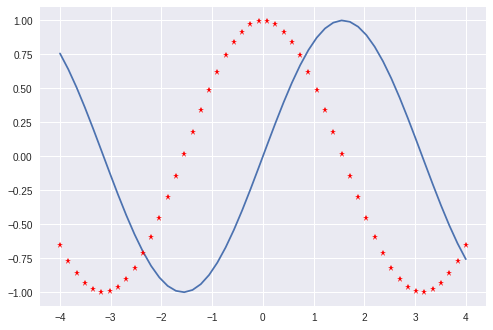

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(-4, 4, 50)
y = np.sin(x)

plt.plot(x, y)
plt.plot(x, np.cos(x), '*', c='r')

plt.show()

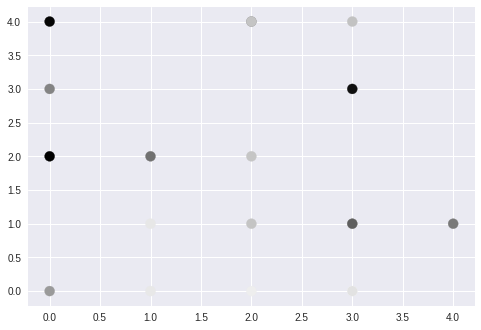

In [59]:
xy = np.random.randint(0, 5, (20, 2))
c = np.random.random_sample(size=20)
plt.scatter(xy[:, 0], xy[:, 1], s=100, c=c)

<Container object of 3 artists>

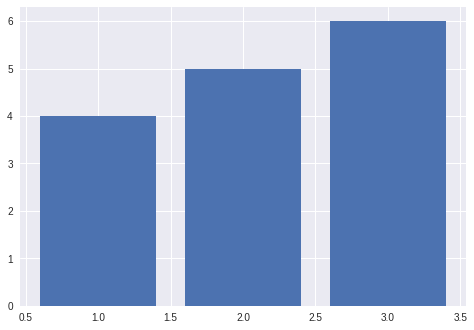

In [60]:
plt.bar([1, 2, 3], [4, 5, 6])

In [61]:
from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline


x = np.linspace(-10, 10, 100)

def func(a):
    plt.xlim((-10, 10))
    plt.ylim((-15, 15))
    plt.plot(x, np.cos(x) * a + x)
    plt.show()

interact(func, a=ipywidgets.IntSlider(min=-10,max=10,step=1,value=2))

<function __main__.func>

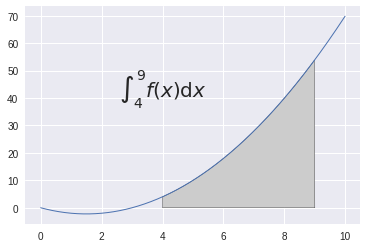

In [62]:
import matplotlib.patches as pc

def func(x):
    return(x - 3) * x

ax = plt.subplot(111)

a, b = 4, 9 # integral area
x = np.arange(0, 10, 0.01)
y = func(x)
plt.plot(x, y, linewidth=1)

ix = np.arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = pc.Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

plt.text(a, 40,
     r"$\int_4^9 f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)


# Scipy

### Оптимизация

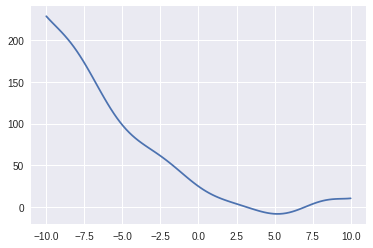

In [63]:
import scipy as sp

def func(x):
    return (x - 2) * np.sin(x) + (x - 5.) ** 2 - x


x = np.linspace(-10, 10, 100)

plt.plot(x, func(x))

In [64]:
sp.optimize.fmin_bfgs(lambda x: (x - 5) ** 2, 0.)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4


array([ 4.99999997])

In [65]:
sp.optimize.fmin_bfgs(func, 0)

Optimization terminated successfully.
         Current function value: -7.987077
         Iterations: 6
         Function evaluations: 27
         Gradient evaluations: 9


array([ 5.19725835])

In [66]:
from sympy import Symbol, sin, lambdify

sym_x = Symbol('x')
sym_y = (sym_x - 2) * sin(sym_x) + (sym_x - 5) ** 2 - sym_x
sym_diff = sym_y.diff(sym_x)

diff = lambdify(sym_x, sym_diff, 'numpy')

sp.optimize.fmin_bfgs(func, 0, diff)

Optimization terminated successfully.
         Current function value: -7.987077
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9


array([ 5.19725836])

In [67]:
import sympy

diff(5)

-1.1079377182734595

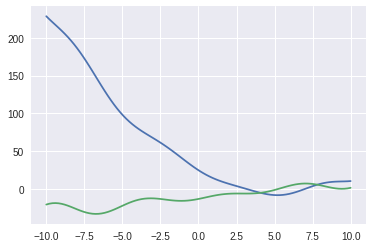

In [68]:
plt.plot(x, func(x))
plt.plot(x, diff(x))